In [3]:
import pandas as pd
import os

# Encontra diretorio atual
atual_dir = os.getcwd()

# Acessa arquivo pkl das noticias
parent_dir = os.path.split(atual_dir)

parent_dir = os.path.split(parent_dir[0])

parent_dir = os.path.split(parent_dir[0])

caminho_pkl = os.path.join(parent_dir[0], "Pre-processamento\\noticias_pre_processadas_df.pkl")

# Carregar dataframe salvo em formato pickle
df = pd.read_pickle(caminho_pkl)

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

print(stopwords.words('portuguese'))
stopwords_list = stopwords.words('portuguese')

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [6]:
df.head()

,Texto,label
0,"[poder, decidir, expulsar, deputado, federal, ...",1
1,"[bolsonaro, liberal, completo, presidente, psl...",1
2,"[ministro, stf, liberar, Andrea, Neves, prisao...",1
3,"[apesar, abundancia, crescer, preocupacao, pre...",1
4,"[harvard, mit, levarao, dilma, moro, suplicy, ...",1


In [7]:
import re
from nltk.stem import PorterStemmer

# Criar o stemmer
porter_stemmer = PorterStemmer()

# Função para aplicar a tokenização e stemming
def stemming_tokenizer(text):
    words = re.sub(r"[^A-Za-z]", " ", text).lower().split()
    words = [porter_stemmer.stem(word) for word in words if word not in stopwords_list]
    stemmed_text = ' '.join(words)
    return stemmed_text


In [8]:
df['features'] = df['Texto'].apply(lambda x: ' '.join(x)).apply(stemming_tokenizer)


In [9]:
print(df['features'])

0        poder decidir expulsar deputado feder carlo ga...
1        bolsonaro liber completo president psl partido...
2        ministro stf liberar andrea neve prisao domici...
3        apesar abundancia crescer preocupacao preserva...
4        harvard mit levarao dilma moro suplici eua meg...
                               ...                        
22279    encontrar reunir president jair bolsonaro mand...
22280    reabertura complexo parqu disney orlar definir...
22281    publicacao circular rede social pedir ministra...
22282    juiz wauner batista ferreiro machadar varar fa...
22283    boato apo zombar miss cidad campo pareci entre...
Name: features, Length: 22284, dtype: object


In [10]:
#separar em features e labels
X = df['features'].values
Y = df['label'].values

In [11]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

#Converter de texto para número
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
# Salvar o vetorizador em um arquivo
with open('vetorizador.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [12]:
X = vectorizer.transform(X)

In [13]:
import pickle
import os

# Carregar a lista 'sequences' de um arquivo usando pickle
# Encontra diretorio atual
atual_dir = os.getcwd()

# Acessa arquivo pkl das noticias
parent_dir = os.path.split(atual_dir)

parent_dir = os.path.split(parent_dir[0])


caminho_pkl = os.path.join(parent_dir[0], "Word2Vec\\sequences.pickle")

with open(caminho_pkl, 'rb') as handle:
    sequences = pickle.load(handle)

In [14]:
import numpy as np

# Calcula o comprimento de cada sequência em 'sequences' e armazena os resultados na lista 'sequence_lengths'
sequence_lengths = [len(seq) for seq in sequences]

# Calcula a média dos comprimentos das sequências usando a função 'mean' do numpy
mean_length = np.mean(sequence_lengths)

# Obtém o comprimento máximo das sequências usando a função 'max' do Python
max_length = max(sequence_lengths)

# Imprime a média e o comprimento máximo das sequências
print("Mean sequence length: ", mean_length)
print("Maximum sequence length: ", max_length)

Mean sequence length:  173.9763956201759
Maximum sequence length:  3835


In [15]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calcula uma porcentagem de 95% dos comprimentos das sequências (preserva 95% das sequências)
max_length = int(np.percentile(sequence_lengths, 95))

# Realiza o preenchimento das sequências com base no novo 'max_length'
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [16]:
import tensorflow.keras.utils as ku

# Converte os labels para one-hot encoding
num_classes = df['label'].nunique()
labels = ku.to_categorical(df['label'], num_classes)

In [17]:
from sklearn.model_selection import train_test_split

# Dividir os dados de treinamento 
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instanciar o modelo de regressão logística
logistic_regression_model = LogisticRegression()

# Redimensionar y_train para ser unidimensional, se necessário
y_train = y_train.ravel()

# Treinar o modelo com os dados de treinamento
logistic_regression_model.fit(X_train, y_train)



LogisticRegression()

In [19]:
# Avaliar o desempenho no conjunto de validação
val_predictions = logistic_regression_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Acurácia no conjunto de validação:", val_accuracy)

Acurácia no conjunto de validação: 0.9189350882440921


In [20]:
# Avaliar o desempenho no conjunto de teste
test_predictions = logistic_regression_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de teste: 0.919533353275501


In [21]:
#salvar modelo

with open('modelo_regressao_logistica.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)

In [22]:
from sklearn.metrics import classification_report

# Fazer previsões nos dados de teste
predicoes_teste = logistic_regression_model.predict(X_test)

# Avaliar as previsões usando um relatório de classificação
relatorio_classificacao = classification_report(y_test, predicoes_teste)

print(relatorio_classificacao)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1711
           1       0.94      0.90      0.92      1632

    accuracy                           0.92      3343
   macro avg       0.92      0.92      0.92      3343
weighted avg       0.92      0.92      0.92      3343



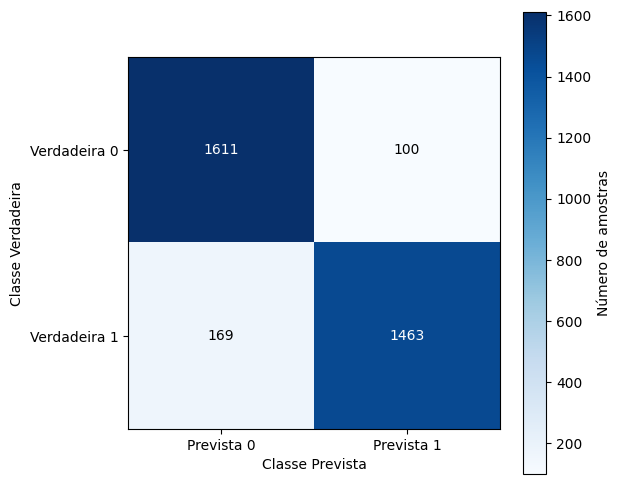

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calcular matriz de confusão
conf_mat = confusion_matrix(y_test, test_predictions)

# Define tamanho da figura
plt.figure(figsize=(6, 6))

# Define mapa de cores
cmap = plt.cm.Blues

# Plot da matriz de confusão
plt.imshow(conf_mat, cmap=cmap, interpolation='nearest')
plt.colorbar(label='Número de amostras')

# Adiciona labels na matriz
plt.xticks([0, 1], labels=['Prevista 0', 'Prevista 1'])
plt.yticks([0, 1], labels=['Verdadeira 0', 'Verdadeira 1'])

# Determina o threshold da cor do texto baseado no valor máximo na matriz de confusão
text_color_threshold = conf_mat.max() / 2

for i in range(2):
    for j in range(2):
        # Escolhe a cor do texto baseado no threshold
        text_color = 'white' if conf_mat[i, j] > text_color_threshold else 'black'
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color=text_color)

# Adiciona labels dos eixos
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')

# Mostra gráfico
plt.show()
